#  Playing with pandas



Sources for this playground is the standard library pandas and input from kaggle tweet desaster or other webpages

---



## 1.Mount drive

In [1]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Update to tables library-pandas need that to avoid write errors

In [2]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3 MB 34.3 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


## 2. Loading libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/drive/MyDrive/pandas-playground/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## 3.Checking for missing values

In [5]:
missing_values= df.isnull().sum().sort_values(ascending= False)/len(df)
print(len(missing_values[missing_values>0]), 'are with missing values' )
print(missing_values[missing_values>0])

2 are with missing values
location    0.332720
keyword     0.008013
dtype: float64


In [ ]:
df.sample(5)

,id,keyword,location,text,target
5529,7887,quarantined,NaN,Ebola: Alabama Home Quarantined Over Possible ...,1
87,129,accident,Maldives,RT nAAYf: First accident in years. Turning ont...,1
2213,3170,deluge,"Brackley Beach, PE, Canada",It's a deluge in Trois-Rivieres. About one hou...,0
2737,3935,devastated,Banbridge,'Er indoors will be devastated. RIP Arfur. #Ge...,1
3819,5428,first%20responders,New York City,I just added 'Sandy First Responders Lost Thei...,1


## Filling na to avoid the problems with all types of string functions ill na it looks as it should be a str type so with empty '' teh best way is to use earlier prepared dictionary what shpould be replaced


In [ ]:
{x:'' for x in list(df.columns)}

{'id': '', 'keyword': '', 'location': '', 'text': '', 'target': ''}

In [ ]:
fillna_dict={'keyword': '', 'location': '', 'text': ''}

In [ ]:
{x:'str' for x in list(df.columns)}

{'id': 'str',
 'keyword': 'str',
 'location': 'str',
 'text': 'str',
 'target': 'str'}

In [ ]:
fill_astype_dict={ 'keyword': 'str',
 'location': 'str',
 'text': 'str',}

In [ ]:
df= df.fillna(fillna_dict)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df= df.astype(fill_astype_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.sample(7)

,id,keyword,location,text,target
4366,6201,hijacker,,Governor Allows Parole for School Bus Hijacker...,1
351,503,army,,One Direction Is my pick for http://t.co/q2eBl...,0
3016,4330,dust%20storm,,I learned more about economics from one South ...,1
6526,9334,survive,Trapped in my Conscience,Like it affects every level of life you're exp...,0
4857,6916,mass%20murderer,,You happen to conveniently 'forget' about how ...,1
3498,4998,explosion,"Long Island, NY",We found a sunflower explosion on our walk. ht...,1
7427,10625,wounded,,Officer wounded suspect killed in exchange of ...,1


In [ ]:
list(df.columns)

['id', 'keyword', 'location', 'text', 'target']

## Making sure that content is utf-8 so decode/encode routine done 

In [ ]:
# df= df.encode('utf-8', 'ignore').decode('utf-8')

for a in ['keyword', 'location', 'text']:
    df[a].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))

In [ ]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
df['text_len']= df['text'].apply(lambda x: len(x))

In [ ]:
df.sample(5)

,id,keyword,location,text,target,text_len
226,321,annihilated,the own zone layer,day 1 of tryouts went good minus the fact I st...,0,123
1699,2454,collided,Roanoke VA,Cyclist who collided with runner on Roanoke gr...,0,120
484,700,attacked,"Los Angeles, CA",@envw98 @NickCoCoFree @JulieDiCaro @jdabe80 I ...,0,127
7587,10841,,,Sirens everywhere!,0,18
3344,4788,evacuated,"Portland, Oregon",Evacuation orders lifted for Roosevelt in High...,1,114


## filtering values in particular column a bit mor than a simple filter using $ 

In [ ]:
df[(df['text_len']>7) &  (df['text_len']<120)  &  (df['keyword'].str.contains('hazard'))]

,id,keyword,location,text,target,text_len
4179,5935,hazard,,@ClassyColkett Thorgan Hazard made his move pe...,0,82
4180,5937,hazard,Australia,#Lifestyle Û÷It makes me sickÛª: Baby clothe...,0,115
4181,5938,hazard,,@LongBreastYat Yeah I don't think he's elite e...,0,108
4182,5939,hazard,"Alameda, CA",Choking Hazard Prompts Recall Of Kraft Cheese ...,1,76
4183,5942,hazard,"London, England",Seeing Hazard without the beard like... http:/...,0,62
4184,5943,hazard,Arizona,Get that hazard pay,0,19
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0,81
4187,5949,hazard,,Road Hazard @ CASCADE RD SW / CHILDRESS DR SW ...,0,68
4191,5954,hazard,,The Eden Hazard of Hockey https://t.co/RbbnjkoqUD,0,49
4192,5955,hazard,Chicago,CONFIRMED: Sanchez Hazard and Bolasie will be ...,1,101


In [ ]:
df.describe()

,id,target,text_len
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


## Using standard lda library fro sklearn

Latent Dirichlet Allocation is a form of unsupervised Machine Learning that is usually used for topic modelling in Natural Language Processing tasks. It is a very popular model for these type of tasks and the algorithm behind it is quite easy to understand and use. Also, the Scikit-Learn library has a very good implementation for the algorithm,


Topic Modelling is an unsupervised Machine Learning task where we try to discover "abstract topics" that can describe a collection of documents. This means we have a collection of texts and we try to find patterns of words and phrases that can help us cluster the documents and group them by "topics".

I put topics into quotes and I call them abstract topics because these are not obvious topics and we don't need them to be. We work on the assumption that similar documents will have similar patterns of words and phrases

For example, let's say we have a collection of 100 texts. We go through each text and discover that ten of them contain words like "machine learning", "training", "supervised", "unsupervised", "dataset" and so on. We may not know what these words mean and we really don't care.

We only see a pattern here, that 10% of our articles contain these words and we conclude that they should be included in the same topic. We can't actually name the topic and again, this is not needed. We are able to cluster these 10 articles into the same topic. And when we get a new text which we have never seen before, we look into it, we find it contains some of these words, then we'll be able to say "hey, this goes into the same category with the other 10 articles!"


---

Latent Dirichlet Allocation algorithm works with a few simple steps. The only preprocessing we need to do is the one we do in almost all text processing tasks: removing the stopwords(words that, with a high probability, are found in most of the documents and don't bring any value)  from all of our documents.

  * Establish a number of n topics that will be identified by the LDA algorithm. How can we find the perfect number of topics? Well, it's not very easy and it's usually a trial and error process: we try different values for n until we are satisfied with the results. Or, maybe we are lucky and we have other information about the dataset that allows us to establish the perfect number of topics.
  * Assign every word in every document to a temporary topic. This temporary topic will be random at first, but will be updated in the next step.
  * For this step we will go through every document and then every word in that document and compute 2 values

the probability that this document belongs to a certaintopic; this is based on how many words(except the currrent word) from this document belong to the topic of the current word

the proportion of documents that are assigned to the topic of the current word because of the current word.

In [6]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1,1),
    max_df=0.9,
    min_df=2,
    max_features=10000,
    binary=False
)

lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=None,  #defaults to 1/n_components; called alpha
    n_jobs=-1,
    max_iter=50,
    random_state=2020
)

In [8]:
count_vec=count_vectorizer.fit_transform(df.text)

In [9]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_vec)
doc_vectors = lda.transform(count_vec)

### Calculate the likelihood of the documents

Given the topic model, we can talk about the likelihood of a document give our corpus topic distribution. Now we calculate the likelihood of the documents under the topic model. Then this enables us to drop or flag unlikely documents.

In [10]:
log_likelihoods = [lda.score(d) for d in count_vec]

In [11]:
df["log_likelihood"] = log_likelihoods

In [12]:
df.sample(7)

,id,keyword,location,text,target,log_likelihood
1210,1744,buildings%20burning,"Chicago, IL",@joshcorman #infosec rather you knew it or no...,0,-22229.403059
1481,2134,catastrophe,NaN,#spark #song Ultimate #preparedness library: h...,0,-22220.311768
6812,9759,trapped,"PA, USA",Leitchfield KY:\n\n Bella Edward &amp; Rosalie...,1,-22255.640377
1751,2519,collision,Maryland,Baltimore City : I-95 NORTH AT MP 54.8 (FORT M...,1,-22312.195757
4634,6586,inundated,"England & Wales Border, UK",@Lenn_Len Probably. We are inundated with them...,0,-22190.191701
3268,4693,engulfed,NaN,Men escape car engulfed in flames in Parley's ...,1,-22246.736682
913,1320,bloody,Storybrooke,@chxrmingprince @jones_luna I should bloody ho...,0,-22214.357664


In [13]:
figsize=(15,5)
plt.hist(['log_likehood'], bins=100) / #here I did mistake and didnt put df and there is strange error

SyntaxError: ignored

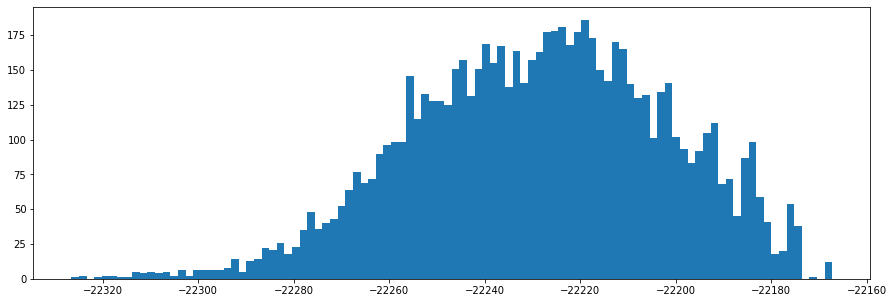

In [14]:
plt.figure(figsize=(15,5))
plt.hist(df["log_likelihood"], bins=100);

or using directly df

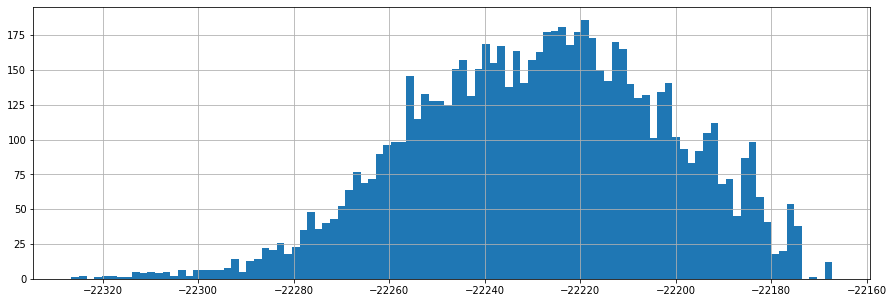

In [18]:
df.log_likelihood.hist(bins=100, figsize=(15,5));

Here we can pick a reasonable threshold to invalidate documents. We just pick −32140-32140−32140 here, more sophisticated approaches can be used to determine a threshold.

Let’s look at some low probability examples.

In [19]:
for a in df[df['log_likelihood']< -22300].text.sample(5).to_list():
    print(a)

@cspanwj If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterrorism&amp;use her lgl/org IDis ID still hers?
#Earthquake #Sismo M 1.4 - 4km E of Interlaken California: Time2015-08-06 00:52:25 UTC2015-08-05 17:52:25 -07... http://t.co/wA5C77F8vQ
USGS EQ: M 1.9 - 5km S of Volcano Hawaii: Time2015-08-06 01:04:01 UTC2015-08-05 15:04:01 -10:00 a... http://t.co/3rrGHT4ewp #EarthQuake
Bomb Crash Loot Riot Emergency Pipe Bomb Nuclear Chemical Spill Gas Ricin Leak Violence Drugs Cartel Cocaine Marijuana Heroine Kidnap Bust
#IDFire Parker Ridge Fact Sheet Aug 6 2015 (Parker Ridge Wildfire): Information Phone: 208-267-6773 Email: pa... http://t.co/ZggpaCjP7D


In [20]:
for a in df[df['log_likelihood']> -22260].text.sample(5).to_list():
    print(a)

My favorite text http://t.co/5U5GAkX2ch
#KAMINDOZ #reuters Debris confirmed from MH370; relatives hope for discovery of crash s... http://t.co/xrdwR8CDvM http://t.co/fxtfFL4aXy
Remove the http://t.co/VbqmZ5aPwj and Linkury Browser Hijacker http://t.co/C2EyjNyBfN http://t.co/gt7gf0fSeX
.@StacDemon with five burning questions for Chris Mullin and St. JohnÛªs in 2015-16: http://t.co/NmRVTHkvAh #SJUBB
I feel like I should be panicking more as Idk I get my results back in a week... I'm Alarmingly calm


How would a random sentence from the new york times score?

In [21]:
text = """
    this is very simple text should be from thotaly different fable lest see
    what LDA would say.
"""
test_count_data = count_vectorizer.transform([text])
test_log_likelihood = lda.score(count_vec)

print(test_log_likelihood)

-489148.8739650735


this is really unlikely! So it looks like our approach is going in the right direction.

## Split by character

In [ ]:
temp_table= data['Name'].str.split(" ", n=1, expand=True)
temp_table

In [ ]:
data['First Name']= temp_table[0]
data['Last Name']= temp_table[1]

In [ ]:
clean_dict={'%':''}

In [ ]:
df1= df1.replace(clean_dict, regex=True)

In [ ]:
df1.loc[2], df1.iloc[2]

## ast.literal.eval() to restore original data type

In [ ]:
df.ast.literal.eval()

In [ ]:
def read_harry_potter():
    lines = []
    with open("../input/harry_potter.txt", "r") as f:
        for line in f.readlines():
            line = line.replace("\n", " ")
            if line:
                lines.append(line)
                
    return "".join(lines)

In [ ]:
text=read_harry_potter()

In [ ]:
df['words_len'] = df['text'].map(lambda x: len(x))

for percentile in [50, 75, 90, 95, 98, 99, 100]:
    print(percentile, np.percentile(df['words_len'], percentile))
    
df['words_len'].hist(bins=50);

In [ ]:
df_light = df.sample(frac=0.1)

In [ ]:
df['Product'].value_counts()

In [ ]:
df['label'] = df['target']
df['target'] = df['target'].factorize()[0]
df['doc_id'] = df.index